## Preprocessing

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_excel('IDataset1.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
#print(X)

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))
#print(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

# Calling the Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 67)

In [6]:
table = dataset.describe()

In [7]:
from openpyxl import load_workbook
path = "E:\PhD\Machine Learning\Final outputs_paper1.xlsx"

book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book

#path = "E:/PhD/Machine Learning/output1.xlsx"
#writer = pd.ExcelWriter(path, engine = 'xlsxwriter')
table.to_excel(writer, sheet_name = 'Dataset summary Imp')
writer.close()

## Applying Grid Search to find the best model and the best parameters

In [2]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, 16],
               'min_samples_split': [2, 3, 4],
               'min_samples_leaf': [1, 2, 3, 4]}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Accuracy: 0.9571534102044957
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


## Training the Decision Tree Regression model on the Training set

In [2]:
regressor = DecisionTreeRegressor(max_depth = 10,
                                  min_samples_split = 2,
                                  min_samples_leaf = 2,
                                  random_state = 67)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, random_state=67)

## Create a KFold object with 5 splits 

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())
regressor

[0.94263138 0.97525661 0.9873244  0.92513089 0.95542377]
0.9571534102044957


DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, random_state=67)

## Predicting the Test set results

In [4]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(file)

[[ 21.5   20.56]
 [321.18 323.97]
 [118.45 114.25]
 [ 91.41  74.26]
 [287.43 293.22]
 [122.41 136.86]
 [100.19  99.  ]
 [127.82 138.  ]
 [350.23 385.24]
 [ 94.45 103.36]
 [132.18 148.77]
 [206.41 239.61]
 [ 88.04  90.43]
 [ 36.36  33.86]
 [206.41 170.01]
 [ 23.    27.91]
 [ 65.81  61.02]
 [ 36.36  22.34]
 [ 33.29   3.04]
 [ 65.81  71.26]
 [374.71 377.38]
 [ 76.62  79.63]
 [ 67.05  73.54]
 [ 38.11  40.54]
 [218.99 204.93]
 [ 33.29  28.38]
 [195.01 159.3 ]
 [ 76.62  74.79]
 [110.01 103.92]
 [ 65.09  65.63]
 [171.86 164.29]
 [ 54.9   52.29]
 [ 50.46  48.96]
 [  6.37   5.49]
 [145.73 151.27]
 [ 56.01  54.48]
 [110.08  96.38]
 [108.62 105.61]
 [ 64.2   64.6 ]
 [ 89.85  97.63]
 [ 47.6   51.99]
 [ 88.04  95.93]
 [285.   271.69]
 [121.53 118.52]
 [195.01 142.84]
 [136.61 124.71]
 [136.61 135.44]
 [ 32.81  24.41]
 [ 15.42  17.94]
 [350.23 367.34]
 [ 51.04  49.1 ]
 [122.41 136.91]
 [ 61.25  67.7 ]
 [229.72 202.75]
 [322.26 343.73]
 [ 90.94  85.17]
 [189.13 172.47]
 [191.53 179.97]
 [ 13.54  15.0

## Evaluating the Model Performance

### R2

In [5]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9702645243769753


## Adjusted R2

In [6]:
#import math

adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)
#print (len (X_test[0]))

0.969131744353241


### RMSE

In [7]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

16.330535047609498

### MAE

In [8]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

11.018970964637578

## Visulaize

Text(0, 0.5, 'Predicted data')

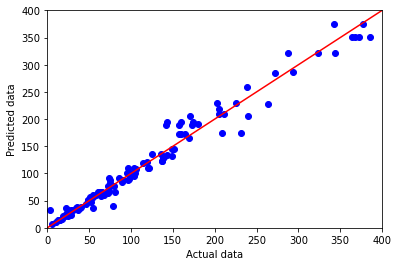

In [9]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,400],[0,400], color = "red")
plt.axis ([0,400,0,400])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

In [21]:
print (y_pred)

print (y_pred[109])

[ 21.5  321.18 118.45  91.41 287.43 122.41 100.19 127.82 350.23  94.45
 132.18 206.41  88.04  36.36 206.41  23.    65.81  36.36  33.29  65.81
 374.71  76.62  67.05  38.11 218.99  33.29 195.01  76.62 110.01  65.09
 171.86  54.9   50.46   6.37 145.73  56.01 110.08 108.62  64.2   89.85
  47.6   88.04 285.   121.53 195.01 136.61 136.61  32.81  15.42 350.23
  51.04 122.41  61.25 229.72 322.26  90.94 189.13 191.53  13.54  81.92
  99.99 189.13 134.04  65.42 174.41  65.81  99.99  60.67  21.5  171.86
  25.9  210.01  26.53 350.23  43.15 174.41 145.73  97.37  64.2   11.13
  15.18 259.07 172.66 210.01  66.62 195.01  33.34 374.71  59.05 165.45
  84.69  21.5  129.83 350.23  13.54  76.62  38.11  56.01 229.72 110.87
  35.71 189.13 228.03  40.18 110.08  88.2   60.67  33.29 322.26  36.36]
36.356867472333334


## Error percentage visualization

Text(250, 75, 'Adj.$R^2$ = 0.969')

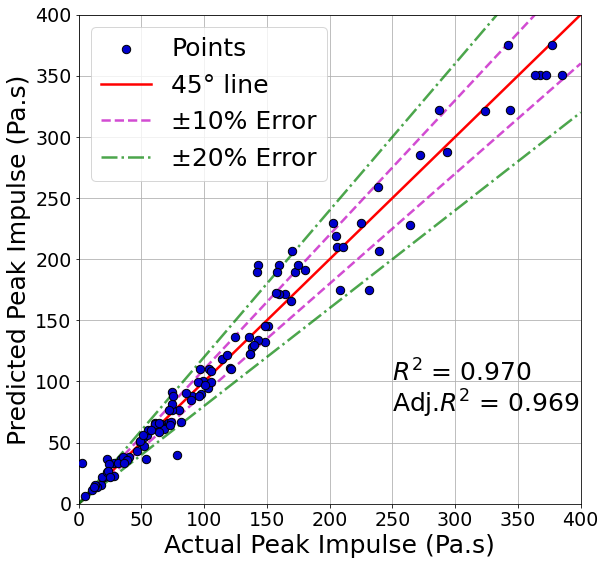

In [10]:
# Generate data

from sklearn.metrics import r2_score
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
ax.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Impulse (Pa.s)',fontsize = 25)
plt.xlabel('Actual Peak Impulse (Pa.s)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,400)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 400)
plt.xlim(0, 400)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



ax.annotate("$R^2$ = {:.3f}".format(r2_score(y_test, y_pred)), (250, 100),fontsize = 25)  #Model is called here
ax.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (250, 75),fontsize = 25)

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')
#print (len (y_test))



In [11]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 67.27%
Within 20% margin 90.00%
Out of 20% margin 10.00%


## <100kPa

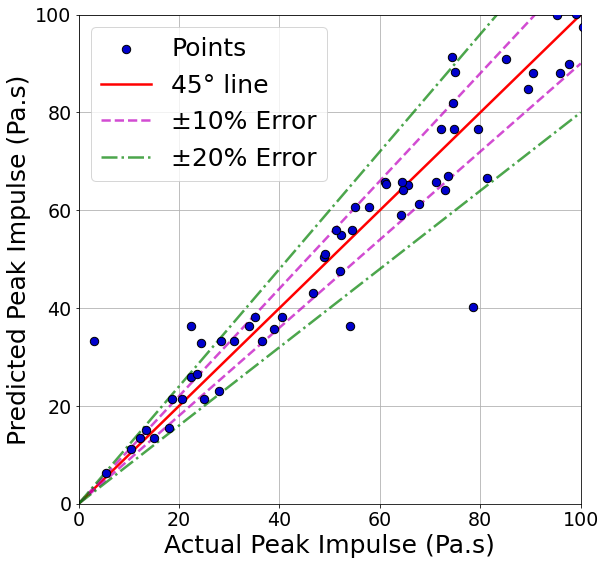

In [12]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, bx = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Impulse (Pa.s)',fontsize = 25)
plt.xlabel('Actual Peak Impulse (Pa.s)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,100)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 100)
plt.xlim(0, 100)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

bx.spines['left'].set_color('black')        # setting up Y-axis tick color to red
bx.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2_score(y_test, y_pred)), (5000, 2000),fontsize = 25)  #Model is called here

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

## Print Output

In [ ]:
df = pd.DataFrame(file).T
df.to_excel(excel_writer = "E:/PhD/Machine Learning/Impulse_paper1/Output_DT.xlsx")